In [1]:
import midynet
import midynet.util.display as display
import matplotlib.pyplot as plt
import pathlib
import numpy as np


display.setup_dir("./")

## Loading data from experiment

In [6]:

dynamics = "ising"
path_to_data = pathlib.Path(f"/home/charles_murphy/Documents/ulaval/doctorat/projects/data/midynet-data/figure2/exact-{dynamics}/")
exp = midynet.experiments.Experiment.load_from_file(path_to_data / "config.pickle")

if dynamics == "sis":
    xlabel = r"Infection probability $[\alpha]$"
elif dynamics == "cowan":
    xlabel = r"Activity gain $[\nu\langle k \rangle]$"
elif dynamics == "ising":
    xlabel = r"Coupling $[J\langle k \rangle]$"

N = exp.config.graph.size
E = exp.config.graph.edge_count.state
T = exp.config.dynamics.num_steps
if dynamics == "sis":
    x = exp.config.dynamics.infection_prob
    xmin, xmax = 0, 1
elif dynamics == "cowan":
    x = exp.config.dynamics.nu
    xmin, xmax = 0, 4
elif dynamics == "ising":
    x = exp.config.dynamics.coupling
    xmin, xmax = 0, 4
ymin, ymax = 0, 1.1
    


## Figure 2

<ipython-input-12-d9da1a3bacb5>:125: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


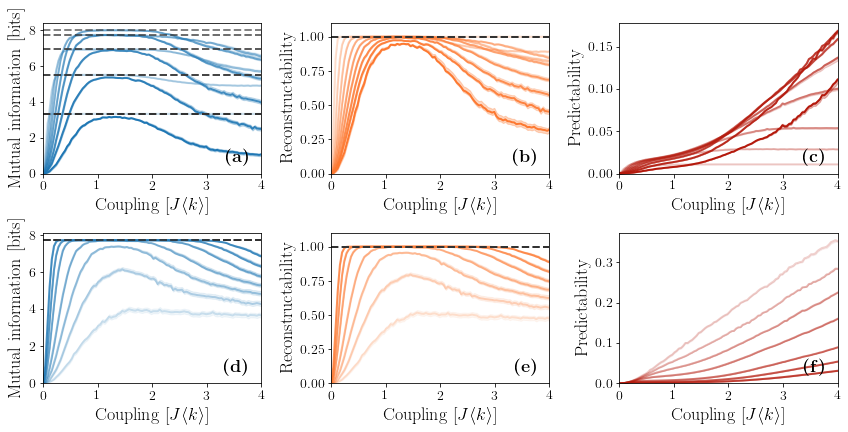

In [12]:
fig = plt.figure(constrained_layout=True, figsize=(12, 6))
gs = fig.add_gridspec(2, 3)

ax = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[1, 0])]
axx = [fig.add_subplot(gs[0, 1]), fig.add_subplot(gs[1, 1])]
axxx = [fig.add_subplot(gs[0, 2]), fig.add_subplot(gs[1, 2])]


mi_color = display.med_colors["blue"]
recon_color = display.dark_colors["orange"]
pred_color = display.dark_colors["red"]
alpha = np.linspace(0, 1, len(E) + 2)[2:] ** 1.

bit_ratio = np.log(2)
hg = midynet.metrics.Statistics({k: exp.metrics["mutualinfo"].data[exp.name][f"hg-{k}"] for k in ["mid", "high", "low"]}) / bit_ratio
hx = midynet.metrics.Statistics({k: exp.metrics["mutualinfo"].data[exp.name][f"hx-{k}"] for k in ["mid", "high", "low"]}) / bit_ratio
hgx = midynet.metrics.Statistics({k: exp.metrics["mutualinfo"].data[exp.name][f"hgx-{k}"] for k in ["mid", "high", "low"]}) / bit_ratio
hxg = midynet.metrics.Statistics({k: exp.metrics["mutualinfo"].data[exp.name][f"hxg-{k}"] for k in ["mid", "high", "low"]}) / bit_ratio
mi = hg - hgx
recon = mi / hg
pred = mi / hx

for ec_index, (ec, a) in enumerate(zip(E, alpha)):
    t_index = len(T) // 2
    t = T[t_index]
    midynet.metrics.Statistics.plot(ax[0], x, mi[t_index, :, ec_index],
             fill_alpha=0.3,
             color=mi_color, 
             alpha=a,
             linestyle="-",
             marker="None",
        )
    
    midynet.metrics.Statistics.plot(axx[0], x, recon[t_index, :, ec_index],
             fill_alpha=0.3,
             color=recon_color, 
             alpha=a,
             linestyle="-",
             marker="None",
        )
    midynet.metrics.Statistics.plot(axxx[0], x, pred[t_index, :, ec_index],
             fill_alpha=0.3,
             color=pred_color, 
             alpha=a,
             linestyle="-",
             marker="None",
        )
    if ec >= 5:
        y = hg[t_index, 0, ec_index]["mid"]
        ax[0].axhline(y, linestyle="--", color=display.dark_colors["grey"], marker="None", linewidth=2, alpha=a)
ax[0].set_xlabel(xlabel, fontsize=18)
ax[0].set_ylabel(r"Mutual information [bits]", fontsize=18)
ax[0].set_xlim([xmin, xmax])
ax[0].set_ylim([0, ax[0].get_ylim()[1]])
# ax[0].tick_params(axis='both', labelsize=14)
display.label_plot(ax[0], r"\textbf{(a)}", loc="lower right", fontsize=18)

axx[0].set_xlabel(xlabel, fontsize=18)
axx[0].set_ylabel(r"Reconstructability", fontsize=18)
axx[0].set_xlim([xmin, xmax])
axx[0].set_ylim([0, 1.1])
# axx[0].tick_params(axis='both', labelsize=14)
axx[0].axhline(1, linestyle="--", color=display.dark_colors["grey"], linewidth=2)
display.label_plot(axx[0], r"\textbf{(b)}", loc="lower right", fontsize=18)

axxx[0].set_xlabel(xlabel, fontsize=18)
axxx[0].set_ylabel(r"Predictability", fontsize=18)
axxx[0].set_xlim([xmin, xmax])
axxx[0].set_ylim([0, axxx[0].get_ylim()[1]])
axxx[0].axhline(1, linestyle="--", color=display.dark_colors["grey"], linewidth=2)
# axxx[0].tick_params(axis='both', labelsize=14)
display.label_plot(axxx[0], r"\textbf{(c)}", loc="lower right", fontsize=18)

for t_index, (t, a) in enumerate(zip(T, alpha)):
    ec_index = 5
    ec = E[ec_index]
    midynet.metrics.Statistics.plot(ax[1], x, mi[t_index, :, ec_index],
             fill_alpha=0.3,
             color=mi_color, 
             alpha=a,
             linestyle="-",
             marker="None",
        )
    
    midynet.metrics.Statistics.plot(axx[1], x, recon[t_index, :, ec_index],
             fill_alpha=0.3,
             color=recon_color, 
             alpha=a,
             linestyle="-",
             marker="None",
        )
    midynet.metrics.Statistics.plot(axxx[1], x, pred[t_index, :, ec_index],
             fill_alpha=0.3,
             color=pred_color, 
             alpha=a,
             linestyle="-",
             marker="None",
        )
    y = hg[t_index, 0, ec_index]["mid"]
    ax[1].axhline(y, linestyle="--", color=display.dark_colors["grey"], marker="None", linewidth=2, alpha=a)
ax[1].set_xlabel(xlabel, fontsize=18)
ax[1].set_ylabel(r"Mutual information [bits]", fontsize=18)
ax[1].set_xlim([xmin, xmax])
ax[1].set_ylim([0, ax[1].get_ylim()[1]])
# ax[1].tick_params(axis='both', labelsize=14)
display.label_plot(ax[1], r"\textbf{(d)}", loc="lower right", fontsize=18)

axx[1].set_xlabel(xlabel, fontsize=18)
axx[1].set_ylabel(r"Reconstructability", fontsize=18)
axx[1].set_xlim([xmin, xmax])
axx[1].set_ylim([0, 1.1])
# axx[1].tick_params(axis='both', labelsize=14)
axx[1].axhline(1, linestyle="--", color=display.dark_colors["grey"], linewidth=2)
display.label_plot(axx[1], r"\textbf{(e)}", loc="lower right", fontsize=18)

axxx[1].set_xlabel(xlabel, fontsize=18)
axxx[1].set_ylabel(r"Predictability", fontsize=18)
axxx[1].set_xlim([xmin, xmax])
axxx[1].set_ylim([0, axxx[1].get_ylim()[1]])
axxx[1].axhline(1, linestyle="--", color=display.dark_colors["grey"], linewidth=2)
# axxx[1].tick_params(axis='both', labelsize=14)
display.label_plot(axxx[1], r"\textbf{(f)}", loc="lower right", fontsize=18)


fig.tight_layout()
fig.savefig(f"./svg/p1-figure2-{dynamics}.svg")
fig.savefig(f"./pdf/p1-figure2-{dynamics}.pdf")
fig.savefig(f"./png/p1-figure2-{dynamics}.png")